In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('P:/python/Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [26]:
data1 = data.copy()

In [27]:
data1 =data1.set_index('Month')

<AxesSubplot:xlabel='Month'>

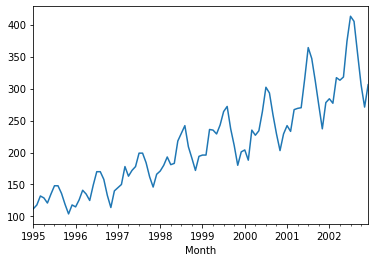

In [29]:
data1.Passengers.plot()

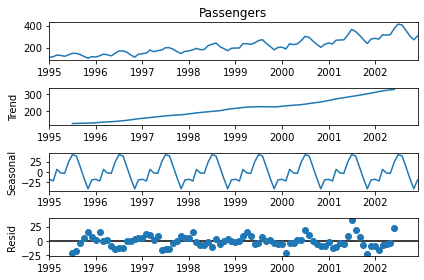

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1.Passengers, period = 12)
decompose_ts_add.plot()
plt.show()

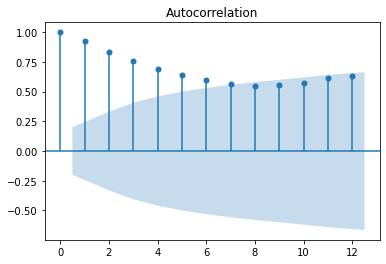

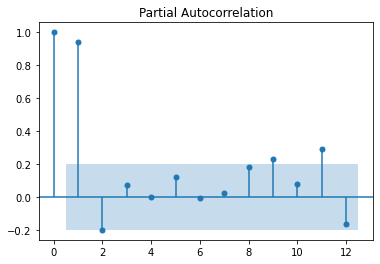

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Passengers, lags = 12)
tsa_plots.plot_pacf(data1.Passengers, lags = 12)
plt.show()

In [32]:
data2 = data.copy()

In [34]:
data2['month'] = data2['Month'].dt.month
data2.head()

,Month,Passengers,month
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [35]:
data2 = pd.get_dummies(data2, columns = ['month'])
data2.head()

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
data2.shape

(96, 17)

In [41]:
data2["t"] = np.arange(1,97)
data2["t_square"] = data2["t"]*data2["t"]
data2.head()

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t,t_square,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [42]:
data2["log_passengers"] = np.log(data2["Passengers"])
data2.head()

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t,t_square,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [44]:
data2.shape

(96, 17)

In [45]:
train = data2.head(84)
test = data2.tail(12)

In [46]:
train

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t,t_square,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,0,0,0,0,0,0,0,1,0,0,0,0,80,6400,5.849325
80,2001-09-01,312,0,0,0,0,0,0,0,0,1,0,0,0,81,6561,5.743003
81,2001-10-01,274,0,0,0,0,0,0,0,0,0,1,0,0,82,6724,5.613128
82,2001-11-01,237,0,0,0,0,0,0,0,0,0,0,1,0,83,6889,5.468060


In [47]:
test

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t,t_square,log_passengers
84,2002-01-01,284,1,0,0,0,0,0,0,0,0,0,0,0,85,7225,5.648974
85,2002-02-01,277,0,1,0,0,0,0,0,0,0,0,0,0,86,7396,5.624018
86,2002-03-01,317,0,0,1,0,0,0,0,0,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,0,0,0,1,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,0,0,0,0,1,0,0,0,0,0,0,0,89,7921,5.762051
89,2002-06-01,374,0,0,0,0,0,1,0,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,0,0,0,0,0,0,1,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585


## Model Building for Model Based Forcasting Methods

### Linear

In [49]:
import statsmodels.formula.api as smf 
model_linear = smf.ols('Passengers~t', data = train).fit()
preds_linear = pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(preds_linear))**2))
rmse_linear

53.199236534802715

### Exponential

In [50]:
model_exp = smf.ols('log_passengers~t',data = train).fit()
preds_exp = pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(preds_exp)))**2))
rmse_exp

46.0573611031562

### Quadratic

In [51]:
model_quad = smf.ols('Passengers~t+t_square',data = train).fit()
preds_quad = pd.Series(model_quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(preds_quad))**2))
rmse_quad

48.051888979330975

### Additive seasonality

In [53]:
model_as = smf.ols('Passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12', data = train).fit()
preds_as = pd.Series(model_as.predict(test[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(preds_as))**2))
rmse_add_sea

132.81978481421822

### Additive seasonality Quadratic

In [54]:
model_asq = smf.ols('Passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12+t+t_square', data = train).fit()
preds_asq = pd.Series(model_asq.predict(test[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(preds_asq))**2))
rmse_add_sea_quad

26.36081761211818

### Multiplicative seasonality

In [56]:
model_ms = smf.ols('log_passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12', data = train).fit()
preds_ms = pd.Series(model_ms.predict(test[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]))
rmse_multi_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(preds_ms)))**2))
rmse_multi_sea

140.0632020470866

### Multiplicative Additive seasonality

In [57]:
model_mas = smf.ols('log_passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12+t', data = train).fit()
preds_mas = pd.Series(model_mas.predict(test[['t', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]))
rmse_multi_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(preds_mas)))**2))
rmse_multi_add_sea

10.51917254432397

### ARIMA

In [64]:
split_point = len(data1) - 12
dataset, validation = data1[0:split_point], data1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('P:/python/dataset.csv', header=False)
validation.to_csv('P:/python/validation.csv', header=False)

Dataset 84, Validation 12


In [71]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.715)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [72]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [75]:
train = pd.read_csv('P:/python/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=87.974
ARIMA(0, 0, 1) RMSE=49.107
ARIMA(0, 1, 0) RMSE=29.116
ARIMA(0, 1, 1) RMSE=28.328
ARIMA(0, 1, 2) RMSE=30.666
ARIMA(0, 1, 3) RMSE=26.562
ARIMA(0, 1, 4) RMSE=24.650
ARIMA(1, 0, 0) RMSE=29.596
ARIMA(1, 0, 1) RMSE=28.465
ARIMA(1, 0, 2) RMSE=85.902
ARIMA(1, 1, 0) RMSE=28.830
ARIMA(1, 1, 1) RMSE=27.792
ARIMA(1, 1, 2) RMSE=25.304
ARIMA(2, 0, 0) RMSE=29.093
ARIMA(2, 1, 0) RMSE=28.255
ARIMA(2, 1, 1) RMSE=25.236
ARIMA(3, 0, 0) RMSE=28.707
ARIMA(3, 0, 1) RMSE=28.652
ARIMA(3, 1, 0) RMSE=28.832
ARIMA(3, 1, 1) RMSE=25.625
ARIMA(4, 0, 0) RMSE=29.279
ARIMA(4, 0, 2) RMSE=28.948
ARIMA(4, 1, 0) RMSE=27.755
ARIMA(4, 1, 1) RMSE=26.573
Best ARIMA(0, 1, 4) RMSE=24.650


In [76]:
rmse_ARIMA = 24.650

In [77]:
data3 = data.copy()

In [78]:
data3['month'] = data3['Month'].dt.month
data3 = pd.get_dummies(data3, columns = ['month'])
data3.head()

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
train1 = data3.head(84)
test1 = data3.tail(12)

## Model Building for Data Driven Forecasting Methods

In [80]:
def RMSE(org, preds):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(preds))**2))
    return rmse

### Simple Exponential Method

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_se = SimpleExpSmoothing(train1["Passengers"]).fit()
preds_se = model_se.predict(start = test1.index[0],end = test1.index[-1])
rmse_sim_exp = RMSE(test1.Passengers, preds_se)
rmse_sim_exp

68.00674031349644

### Holt method

In [82]:
from statsmodels.tsa.holtwinters import Holt
model_h = Holt(train1["Passengers"]).fit()
preds_h = model_h.predict(start = test1.index[0],end = test1.index[-1])
rmse_holt = RMSE(test1.Passengers, preds_h)
rmse_holt

58.57384693071804

### Holts winter exponential smoothing with additive seasonality and additive trend

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hwe_as_at = ExponentialSmoothing(train1["Passengers"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
preds_hwe_as_at = model_hwe_as_at.predict(start = test1.index[0],end = test1.index[-1])
rmse_hwe_add_sea_add_trend = RMSE(test1.Passengers, preds_hwe_as_at)
rmse_hwe_add_sea_add_trend

62.71406428068746

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [84]:
model_hwe_ms_at = ExponentialSmoothing(train1["Passengers"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit()
preds_hwe_ms_at = model_hwe_ms_at.predict(start = test1.index[0],end = test1.index[-1])
rmse_hwe_multi_sea_add_trend = RMSE(test1.Passengers, preds_hwe_ms_at)
rmse_hwe_multi_sea_add_trend

64.77748540879074

In [85]:
list = [['Linear', rmse_linear], ['Exponential', rmse_exp], ['Quadratic', rmse_quad], ['Additive Seasonality', rmse_add_sea], 
        ['Additive Seasonality Quadratic', rmse_add_sea_quad], ['Multiplicative Seasonality', rmse_multi_sea], 
        ['Multiplicative Additive Seasonality', rmse_multi_add_sea], ['ARIMA', rmse_ARIMA],
        ['Simple Exponential', rmse_sim_exp], ['Holt', rmse_holt],
        ['Holt Exp Additive Seasonality and Trend', rmse_hwe_add_sea_add_trend], 
        ['Holt Exp Multi Seasonality and Additive Trend', rmse_hwe_multi_sea_add_trend]]

In [86]:
dataset = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
dataset

,Model,RMSE_Value
0,Linear,53.199237
1,Exponential,46.057361
2,Quadratic,48.051889
3,Additive Seasonality,132.819785
4,Additive Seasonality Quadratic,26.360818
5,Multiplicative Seasonality,140.063202
6,Multiplicative Additive Seasonality,10.519173
7,ARIMA,24.650000
8,Simple Exponential,68.006740
9,Holt,58.573847


### Building Final Model with Multiplicative additive seasonality

In [90]:
model_final = smf.ols('log_passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12+t', data = data2).fit()
preds_final = pd.Series(model_final.predict(data2[['t', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]))
rmse_final = np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(np.exp(preds_final)))**2))
rmse_final

8.933548467712544

In [93]:
pred_data = pd.DataFrame({'Actual' : np.log(data2.Passengers), 'Predicted' : preds_final})
pred_data

,Actual,Predicted
0,4.718499,4.692963
1,4.770685,4.703487
2,4.882802,4.846666
3,4.859812,4.813814
4,4.795791,4.807291
...,...,...
91,6.003887,5.978339
92,5.872118,5.868100
93,5.723585,5.737989
94,5.602119,5.607538


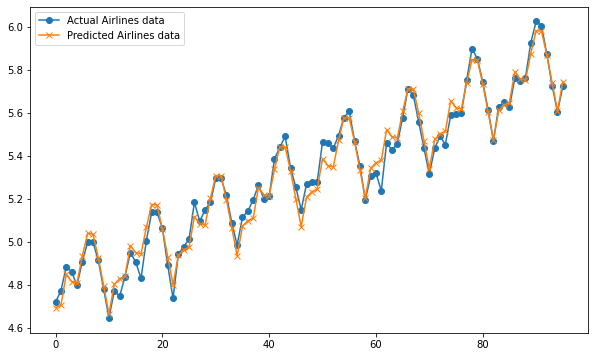

In [101]:
plt.figure(figsize = (10, 6))
plt.plot(np.log(data2.Passengers), marker = 'o', label = 'Actual Airlines data')
plt.plot(preds_final, marker = 'x', label = 'Predicted Airlines data')
plt.legend()
plt.show()

I loaded dataset to addition load requried libraries. Later converted month column as index for plot data. And i plot passengers column for knowing trend and seasonality and i observed that passengers data is following linear multiplicative seasonality. Later i extracted separate month column from whole month coulmn and i created dummie varibles for month column. Then for model based method i created t, t square and log transformation for passengers columns. Now i build model based models like linear, exponential, quadratic, additive seasonal, additive seasonal quadratic, multiplicative seasonality, multiplicative additive seasonality and arima then data driven models like simple exponential, holt, Holt Exp Additive Seasonality and Trend and Holt Exp Multi Seasonality and Additive Trend. Later i created a dataset with all model names and rmse values. In conclusion i build final model with Multiplicative Additive Seasonality which rmse values 10.51 and building model with whole data i got rmse as 8.93. Finally i plot actual and predicte values.